In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
application = pd.read_csv("D:/Dataset/Credit Risk/application_record.csv")
credit = pd.read_csv("D:/Dataset/Credit Risk/credit_record.csv")

In [3]:
display(application.head())
print(application.shape)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


(438557, 18)


In [4]:
display(credit.head())
print(credit.shape)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


(1048575, 3)


In [5]:
print('Count of unique customers in application -',len(application['ID'].unique()))
print('Count of unique customers in credit -',len(credit['ID'].unique()))
print('Count of unique customers present in both dataframes -',len(np.intersect1d(application['ID'].unique(),credit['ID'].unique())))

Count of unique customers in application - 438510
Count of unique customers in credit - 45985
Count of unique customers present in both dataframes - 36457


## VINTAGE ANALYSIS

In [6]:
def create_quarters(x):
        if x<=0 and x>=-3:  
            return '1_q4'
        
        elif x<=-4 and x>=-6:  
            return '1_q3'

        elif x<=-7 and x>=-9:  
            return '1_q2'
        
        elif x<=-10 and x>=-12:  
            return '1_q1'

        elif x<=-13 and x>=-15:  
            return '2_q4'

        elif x<=-16 and x>=-18:  
            return '2_q3'
        
        elif x<=-19 and x>=-21:  
            return '2_q2'

        elif x<=-22 and x>=-24:  
            return '2_q1'

        elif x<=-25 and x>=-27:  
            return '3_q4'

        elif x<=28 and x>=-30:  
            return '3_q3'

        elif x<=31 and x>=-33:  
            return '3_q2'

        elif x<=34 and x>=-36:  
            return '3_q1'

        elif x<=37 and x>=-39:  
            return '4_q4'

        elif x<=40 and x>=-42:  
            return '4_q3'
        
        elif x<=43 and x>=-45:  
            return '4_q2'
        
        elif x<=46 and x>=-48:  
            return '4_q1'
        
        elif x<=49 and x>=-51:  
            return '5_q4'
        
        elif x<=52 and x>=-54:  
            return '5_q3'
        
        elif x<=55 and x>=-57:  
            return '5_q2'
        
        elif x<=58 and x>=-60:  
            return '5_q1'


In [7]:
labels = ['5_q1','5_q2','5_q3','5_q4',
        '4_q1','4_q2','4_q3','4_q4',
        '3_q1','3_q2','3_q3','3_q4',
        '2_q1','2_q2','2_q3','2_q4',
        '1_q1','1_q2','1_q3','1_q4']

table1 = pd.DataFrame(credit.groupby('ID')['MONTHS_BALANCE'].min()).rename(columns={'MONTHS_BALANCE':'month_acc_opened'})
table1['month_acc_closed'] = credit.groupby('ID')['MONTHS_BALANCE'].max() 
table1['window'] = table1['month_acc_closed'] - table1['month_acc_opened'] # For how long can we monitor this account
table1['period'] = table1['month_acc_opened'].apply(create_quarters)
table1.reset_index(inplace = True)
table1

,ID,month_acc_opened,month_acc_closed,window,period
0,5001711,-3,0,3,1_q4
1,5001712,-18,0,18,2_q3
2,5001713,-21,0,21,2_q2
3,5001714,-14,0,14,2_q4
4,5001715,-59,0,59,5_q1
...,...,...,...,...,...
45980,5150482,-28,-11,17,3_q3
45981,5150483,-17,0,17,2_q3
45982,5150484,-12,0,12,1_q1
45983,5150485,-1,0,1,1_q4


In [8]:
credit1 = pd.merge(credit, table1, on = 'ID', how = 'left')
#credit1 = credit1[credit1['window']>20]
credit1['month_on_book'] = credit1['MONTHS_BALANCE'] - credit1['month_acc_opened']
credit1['dpd_greater_60'] = credit1['STATUS'].apply(lambda x: 1 if x in ['2','3','4','5'] else 0)
#credit1.dropna(inplace=  True)
#credit1.reset_index(inplace=True, drop=True)
credit1

,ID,MONTHS_BALANCE,STATUS,month_acc_opened,month_acc_closed,window,period,month_on_book,dpd_greater_60
0,5001711,0,X,-3,0,3,1_q4,3,0
1,5001711,-1,0,-3,0,3,1_q4,2,0
2,5001711,-2,0,-3,0,3,1_q4,1,0
3,5001711,-3,0,-3,0,3,1_q4,0,0
4,5001712,0,C,-18,0,18,2_q3,18,0
...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29,3_q3,4,0
1048571,5150487,-26,C,-29,0,29,3_q3,3,0
1048572,5150487,-27,C,-29,0,29,3_q3,2,0
1048573,5150487,-28,C,-29,0,29,3_q3,1,0


In [9]:
table2 = table1.groupby('period').agg({'ID':'count'})
table2.reset_index(inplace=True)
table2.columns = ['period','no_of_acc'] 
table2

,period,no_of_acc
0,1_q1,3050
1,1_q2,3155
2,1_q3,2874
3,1_q4,2746
4,2_q1,2658
5,2_q2,2653
6,2_q3,2887
7,2_q4,2850
8,3_q1,2199
9,3_q2,2218


In [10]:
vintage = credit1.groupby(['period','month_on_book']).agg({'ID':'count'})
vintage.reset_index(inplace=True)
vintage['due_count'] = np.nan
vintage = vintage[['period','month_on_book','due_count']]

vintage = pd.merge(vintage, table2, on = 'period', how = 'left')
vintage

,period,month_on_book,due_count,no_of_acc
0,1_q1,0,NaN,3050
1,1_q1,1,NaN,3050
2,1_q1,2,NaN,3050
3,1_q1,3,NaN,3050
4,1_q1,4,NaN,3050
...,...,...,...,...
645,5_q4,47,NaN,1678
646,5_q4,48,NaN,1678
647,5_q4,49,NaN,1678
648,5_q4,50,NaN,1678


In [11]:
for period in vintage['period'].unique():
    ls = []
    for month in vintage['month_on_book'].unique():
        #if str(year) == period[0]:
            due = list(credit1[ (credit1['period'] == period) & (credit1['month_on_book'] == month) & (credit1['dpd_greater_60'] == 1)]['ID'])
            ls.extend(due)
            vintage.loc[(vintage['period'] == period) & (vintage['month_on_book'] == month),'due_count'] = len(set(ls))

vintage['cum_rate'] = vintage['due_count']/vintage['no_of_acc']
vintage

,period,month_on_book,due_count,no_of_acc,cum_rate
0,1_q1,0,0.0,3050,0.000000
1,1_q1,1,1.0,3050,0.000328
2,1_q1,2,6.0,3050,0.001967
3,1_q1,3,8.0,3050,0.002623
4,1_q1,4,9.0,3050,0.002951
...,...,...,...,...,...
645,5_q4,47,32.0,1678,0.019070
646,5_q4,48,32.0,1678,0.019070
647,5_q4,49,32.0,1678,0.019070
648,5_q4,50,32.0,1678,0.019070


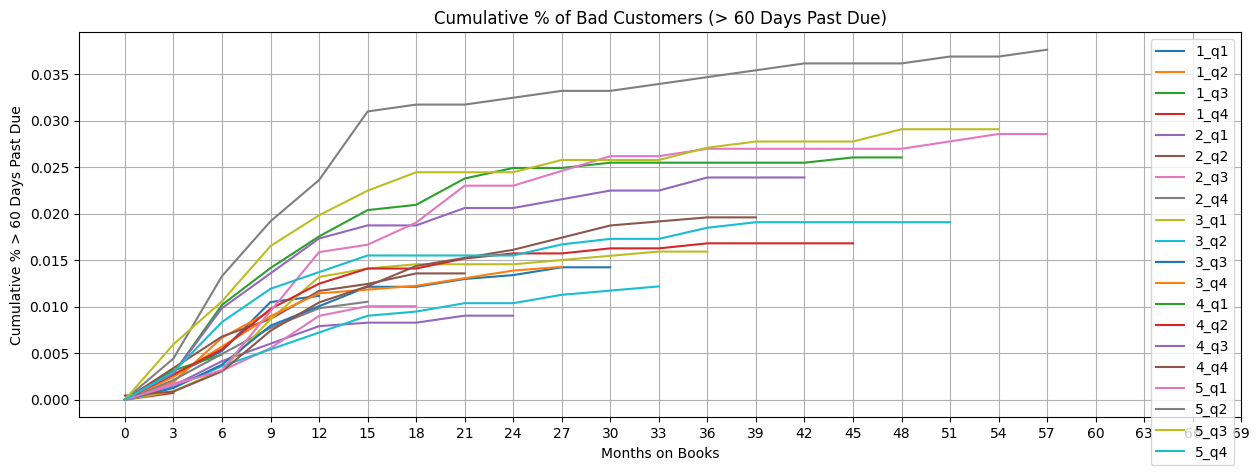

In [12]:
vintage_wide = vintage.pivot(index = 'period',
                             columns = 'month_on_book',
                             values = 'cum_rate')

vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,60,3)]
ax = vintage_wide[lst].T.plot(legend = False, grid = True, figsize=(15,5),title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.xticks([i for i in range(0,70,3)])
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.legend(loc = 'best')
    
plt.show()

A 18 month window should work as after that the cumulative % of bad customers does not increase that significantly

## OBSERVE WINDOW ANALYSIS

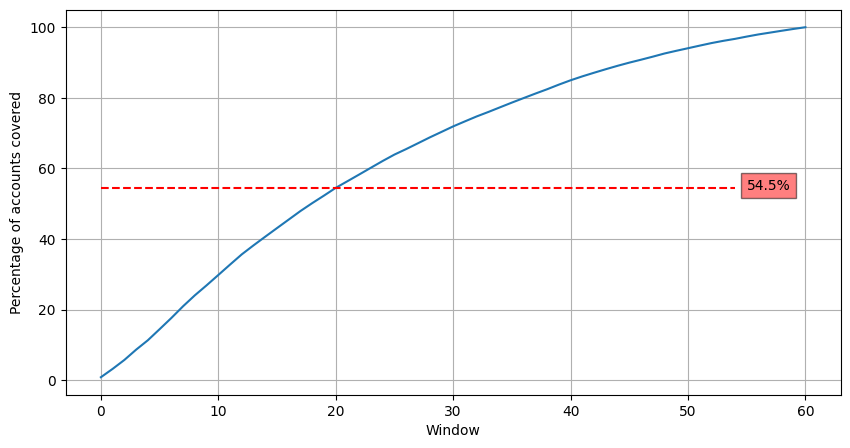

In [13]:
acc_cover_percent = []

for window in range(0,61):
    no_of_acc_covered = len(table1[table1['window'] <= window]['ID'].unique())
    ratio = round(no_of_acc_covered/table1['ID'].nunique()*100,2)
    acc_cover_percent.append(ratio)

plt.figure(figsize=(10,5))
plt.plot(acc_cover_percent)
plt.plot([54.5 for i in range(0,55)], '--', color = 'red')
plt.text(55,54,'54.5%',  bbox = dict(facecolor = 'red', alpha = 0.5))
plt.xlabel('Window')
plt.ylabel('Percentage of accounts covered')
plt.grid()

An observe window of 20 covers 54.5% of data and an observe window of 60 covers 100% of data

In [18]:
credit2 = pd.merge(credit, table1, on = 'ID', how = 'left')
credit2

,ID,MONTHS_BALANCE,STATUS,month_acc_opened,month_acc_closed,window,period
0,5001711,0,X,-3,0,3,1_q4
1,5001711,-1,0,-3,0,3,1_q4
2,5001711,-2,0,-3,0,3,1_q4
3,5001711,-3,0,-3,0,3,1_q4
4,5001712,0,C,-18,0,18,2_q3
...,...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29,3_q3
1048571,5150487,-26,C,-29,0,29,3_q3
1048572,5150487,-27,C,-29,0,29,3_q3
1048573,5150487,-28,C,-29,0,29,3_q3


In [19]:
d = {'0':'past due more than 1 day',
     '1':'past due more than 30 days',
     '2':'past due more than 60 days',
     '3':'past due more than 90 days',
     '4':'past due more than 120 days',
     '5':'past due more than 150 days'}

sum_d = []

for status in credit2["STATUS"].unique():
    if status in d:
        ratio = credit2[credit2['STATUS'] == status]['ID'].nunique()/credit2['ID'].nunique()*100
        sum_d.append((d[status],round(ratio,2)))

summary = pd.DataFrame(sum_d, columns=['situation','% of bad customer'])
summary

,situation,% of bad customer
0,past due more than 1 day,86.94
1,past due more than 30 days,11.31
2,past due more than 60 days,1.30
3,past due more than 90 days,0.58
4,past due more than 120 days,0.41
5,past due more than 150 days,0.42
